Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

Ticket #: Ticket number assigned to each complaint
Customer Complaint: Description of complaint
Date: Date of complaint
Time: Time of complaint
Received Via: Mode of communication of the complaint
City: Customer city
State: Customer state
Zipcode: Customer zip
Status: Status of complaint
Filing on behalf of someone
Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.style as style

import matplotlib.pyplot as plt
style.use('fivethirtyeight')
plt.figsize=(10,10)

Import data into Python environment.

In [2]:
comcast_df=pd.read_csv(r'Comcast_telecom_complaints_data.csv',infer_datetime_format=True)

In [3]:
import datetime
comcast_df['DateStamp']=pd.to_datetime(comcast_df['Date_month_year'])

Provide the trend chart for the number of complaints at monthly and daily granularity levels.

<AxesSubplot:xlabel='DateStamp'>

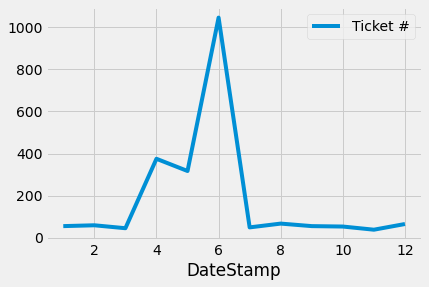

In [4]:
groupedbyds_month_df=comcast_df.groupby(comcast_df['DateStamp'].dt.month).count()
(groupedbyds_month_df[['Ticket #']]).plot(kind='line')


<AxesSubplot:xlabel='DateStamp'>

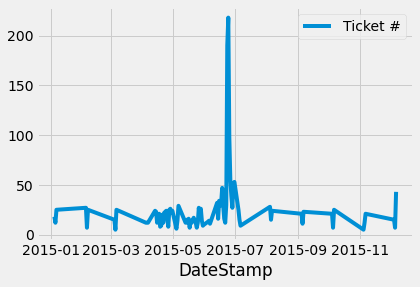

In [5]:
groupedbyds_date_df=comcast_df.groupby(comcast_df['DateStamp'].dt.date).count()
(groupedbyds_date_df[['Ticket #']]).plot()

Provide a table with the frequency of complaint types

In [6]:
comcast_df['Received Via'].value_counts()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

In [7]:
comcast_df['Customer Complaint'].value_counts()

Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Comcast Billing                                  11
                                                 ..
Improper Billing and non resolution of issues     1
Deceptive trade                                   1
intermittent internet                             1
Internet Speed on Wireless Connection             1
Comcast, Ypsilanti MI Internet Speed              1
Name: Customer Complaint, Length: 1841, dtype: int64

Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [8]:
def checkStatus(x):
    if x=='Open' or x=='Pending':
        return 'Open'
    else:
        return 'Closed'
comcast_df["ModifiedStatus"]=comcast_df['Status'].apply(checkStatus)
comcast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   object        
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
 11  DateStamp                    2224 non-null 

Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3

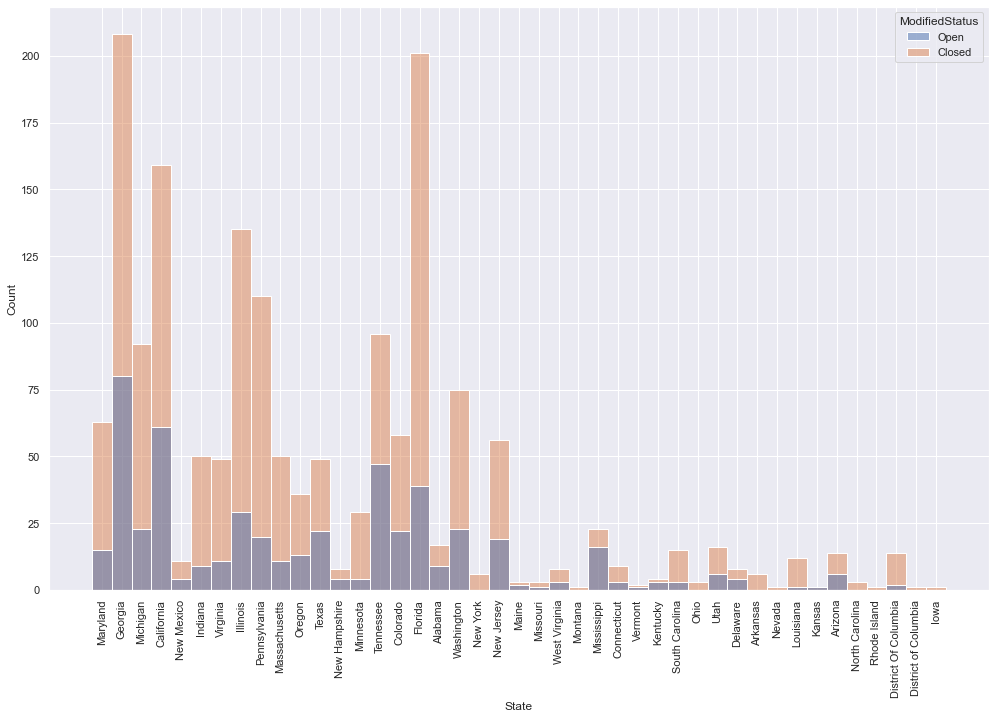

In [9]:
sns.set(rc={'figure.figsize':(8,6)})
dims = (15, 10)
fig, ax = plt.subplots(figsize=dims)
plt.xticks(rotation=90)
hueorder=['Open','Closed']
ax=sns.histplot(data=comcast_df,x=comcast_df['State'],hue='ModifiedStatus',hue_order=hueorder)

Which state has the maximum complaints

In [10]:
pd.DataFrame(comcast_df['State'].value_counts()).reset_index().iloc[0,0]

'Georgia'

Which state has the highest percentage of unresolved complaints

In [11]:
pd.DataFrame(comcast_df[comcast_df['ModifiedStatus']=='Open']['State'].value_counts(normalize=True)).reset_index().iloc[0][0]

'Georgia'

Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [12]:
comcast_df[comcast_df['ModifiedStatus']=='Closed']['Received Via'].value_counts(normalize=True)

Customer Care Call    0.506151
Internet              0.493849
Name: Received Via, dtype: float64